<a href="https://colab.research.google.com/github/noah40povis/DS-Unit-1-Sprint-2-Statistics/blob/master/module%203/LS_DS_123_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



In [0]:
import pandas as pd 
from scipy import stats
import scipy
import numpy as np

In [0]:
def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate):
  numerator = true_positive_rate * prob_drunk_prior 
  denominator = (true_positive_rate * prob_drunk_prior) + false_positive_rate*(1-prob_drunk_prior)
  posterior_probability = numerator / denominator 
  
  if posterior_probability > .95:
    return "Given a p-value of 1- ", posterior_probability, " we reject the null hypothesis that this individual is sober."
  else:
    return "Given a p-value of 1-", posterior_probability, " we fail to reject the null hypothesis that this individual is sober."


In [5]:
prob_drunk_given_positive(.001, .08, 1)

('Given a p-value of 1-',
 0.012357884330202669,
 ' we fail to reject the null hypothesis that this individual is sober.')

In [6]:
.001 +  0.012357884330202669

0.013357884330202668

In [8]:
prob_drunk_given_positive(0.013357884330202668, .08,1)

('Given a p-value of 1-',
 0.14473932566889247,
 ' we fail to reject the null hypothesis that this individual is sober.')

In [7]:
prob_drunk_given_positive(0.013357884330202668+0.14473932566889247, .08, 1)

('Given a p-value of 1-',
 0.701253526148492,
 ' we fail to reject the null hypothesis that this individual is sober.')

In [9]:
prob_drunk_given_positive(0.013357884330202668+0.14473932566889247+0.701253526148492, .08, 1)

('Given a p-value of 1- ',
 0.9870756874494572,
 ' we reject the null hypothesis that this individual is sober.')

**Answers to problem 1** 

1. The probability of someone being drunk after one test is 1.2% or .012

2. 14.47% or .1447 

3. 4

**2**


In [0]:
help(scipy.stats.bayes_mvs)

In [0]:
column_names = ['Clump Thickness' , 'Uniformity of Cell Size ', 'Uniformity of Cell Shape', 'Marginal Adhesion ', 'Single Epithelial Cell Size',
                'Bare Nuclei', 'Bland Chromatin','Normal Nucleoli', 'Mitoses','Class']           


df3 = pd.read_csv('/content/breast-cancer-wisconsin.data', names= column_names)

In [18]:
df3.dtypes

Clump Thickness                 int64
Uniformity of Cell Size         int64
Uniformity of Cell Shape        int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Bland Chromatin                 int64
Normal Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [0]:
observed = pd.crosstab(df3['Clump Thickness'], df3['Uniformity of Cell Shape'], margins=True)

observed

In [0]:
chi2, p_value, dof, expected = stats.chi2_contingency(observed)

print(" chi2 statistic", chi2)
print("\n p-value", p_value)
print("\n degrees of freedom",dof)
print("\n expected frequencies table: \n", expected)


In [14]:
scipy.stats.bayes_mvs(observed, alpha=.95)

(Mean(statistic=23.107438016528924, minmax=(9.737352533261346, 36.477523499796504)),
 Variance(statistic=5611.166129710044, minmax=(4349.9868699152075, 7230.517647713296)),
 Std_dev(statistic=74.74918452723905, minmax=(65.95443025237356, 85.03245055690972)))

In [0]:
def confidence_interval(data, confidence=0.95):
  data = np.array(data)
  x_bar = np.mean(data)
  n = len(data)
  s = data.std(ddof=1)
  stderr= s / np.sqrt(n)
  t = stats.t.ppf((1+confidence) / 2.0, n-1)
  margin_of_error = t * stderr
  lower_bound = x_bar - margin_of_error
  upper_bound = x_bar + margin_of_error
  return (lower_bound, upper_bound, x_bar)

In [16]:
confidence_interval(observed)

(-26.795125150025278, 73.01000118308312, 23.107438016528924)

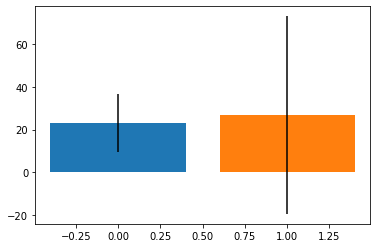

In [17]:

import matplotlib.pyplot as plt

plt.bar(0, height=23.107438016528924, yerr=(36.477523499796504-23.107438016528924))
plt.bar(1, height=26.795125150025278, yerr=(73.01000118308312-26.795125150025278))
plt.show()

**####3**


The difference between bayensian statistics and frequentist statistics is that bayensian statistics can work well with smaller data sizes because it takes in the probability of certain conditional probabilities beforehand whereas frequentist stat can only rely on the sample size it has and the proper randomization of that sample size. 

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!